In [1]:
#Basic and most important libraries
import pandas as pd , numpy as np
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler , MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

#Data processing functions
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#classification model
from sklearn.neighbors import KNeighborsClassifier

#testing accuracy
from sklearn import metrics
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_theme()

In [3]:
ir=pd.read_csv("Iris.csv")

In [4]:
ir.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
ir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
ir.shape

(150, 6)

In [7]:
ir.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
ir.drop(columns=["Id"],inplace=True)

In [9]:
ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
#data visualization

In [11]:
ir.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [12]:
y_axis=[]
setosa=0
versicolor=0
virginica=0

for sp in ir["Species"]:
    if sp=="Iris-setosa":
        setosa+=1
    if sp=="Iris-versicolor":
        versicolor+=1
    if sp=="Iris-virginica":
        virginica+=1

y_axis.append(setosa)
y_axis.append(versicolor)
y_axis.append(virginica)

In [13]:
y_axis

[50, 50, 50]

In [14]:
x_axis=["setosa","versicolor","virginica"]

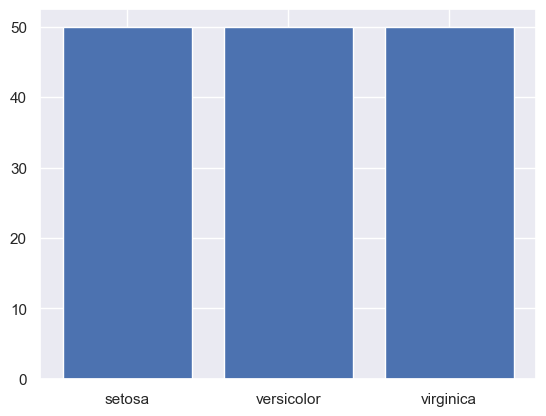

In [15]:
plt.bar(x_axis, y_axis)
plt.show()

In [16]:
ir["Species"] = le.fit_transform(ir["Species"])

In [17]:
ir.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
X = ir.drop(columns=["Species"])
Y = ir["Species"]
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

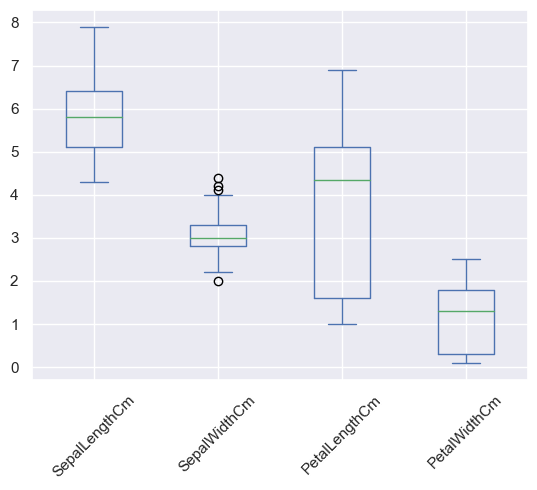

In [19]:
X.plot.box()
plt.xticks(rotation = 45)
plt.show()

In [20]:
StSc = StandardScaler()
X_train  = StSc.fit_transform(X_train)
X_test  = StSc.fit_transform(X_test)

In [21]:
KNN = KNeighborsClassifier(leaf_size=1,p=2,n_neighbors=5)
KNN.fit(X_train,y_train)
y_pred = KNN.predict(X_test)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print(classification_report(y_pred,y_test))
print("Confusion Matrix:>\n",confusion_matrix)
print("\nKNeighborsClassifier:>",accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.88      1.00      0.93        14
           2       1.00      0.82      0.90        11

    accuracy                           0.95        38
   macro avg       0.96      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

Confusion Matrix:>
 [[13  0  0]
 [ 0 14  2]
 [ 0  0  9]]

KNeighborsClassifier:> 0.9473684210526315


In [22]:
prediction_output=pd.DataFrame(data=[y_test.values,y_pred],index=['y_test','y_pred'])

In [23]:
prediction_output.transpose()

,y_test,y_pred
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1
